In [8]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
df = pd.read_csv('data/co2.csv', index_col='date', parse_dates=['date'])

In [9]:
df.head()

,CO2_ppm
date,
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86


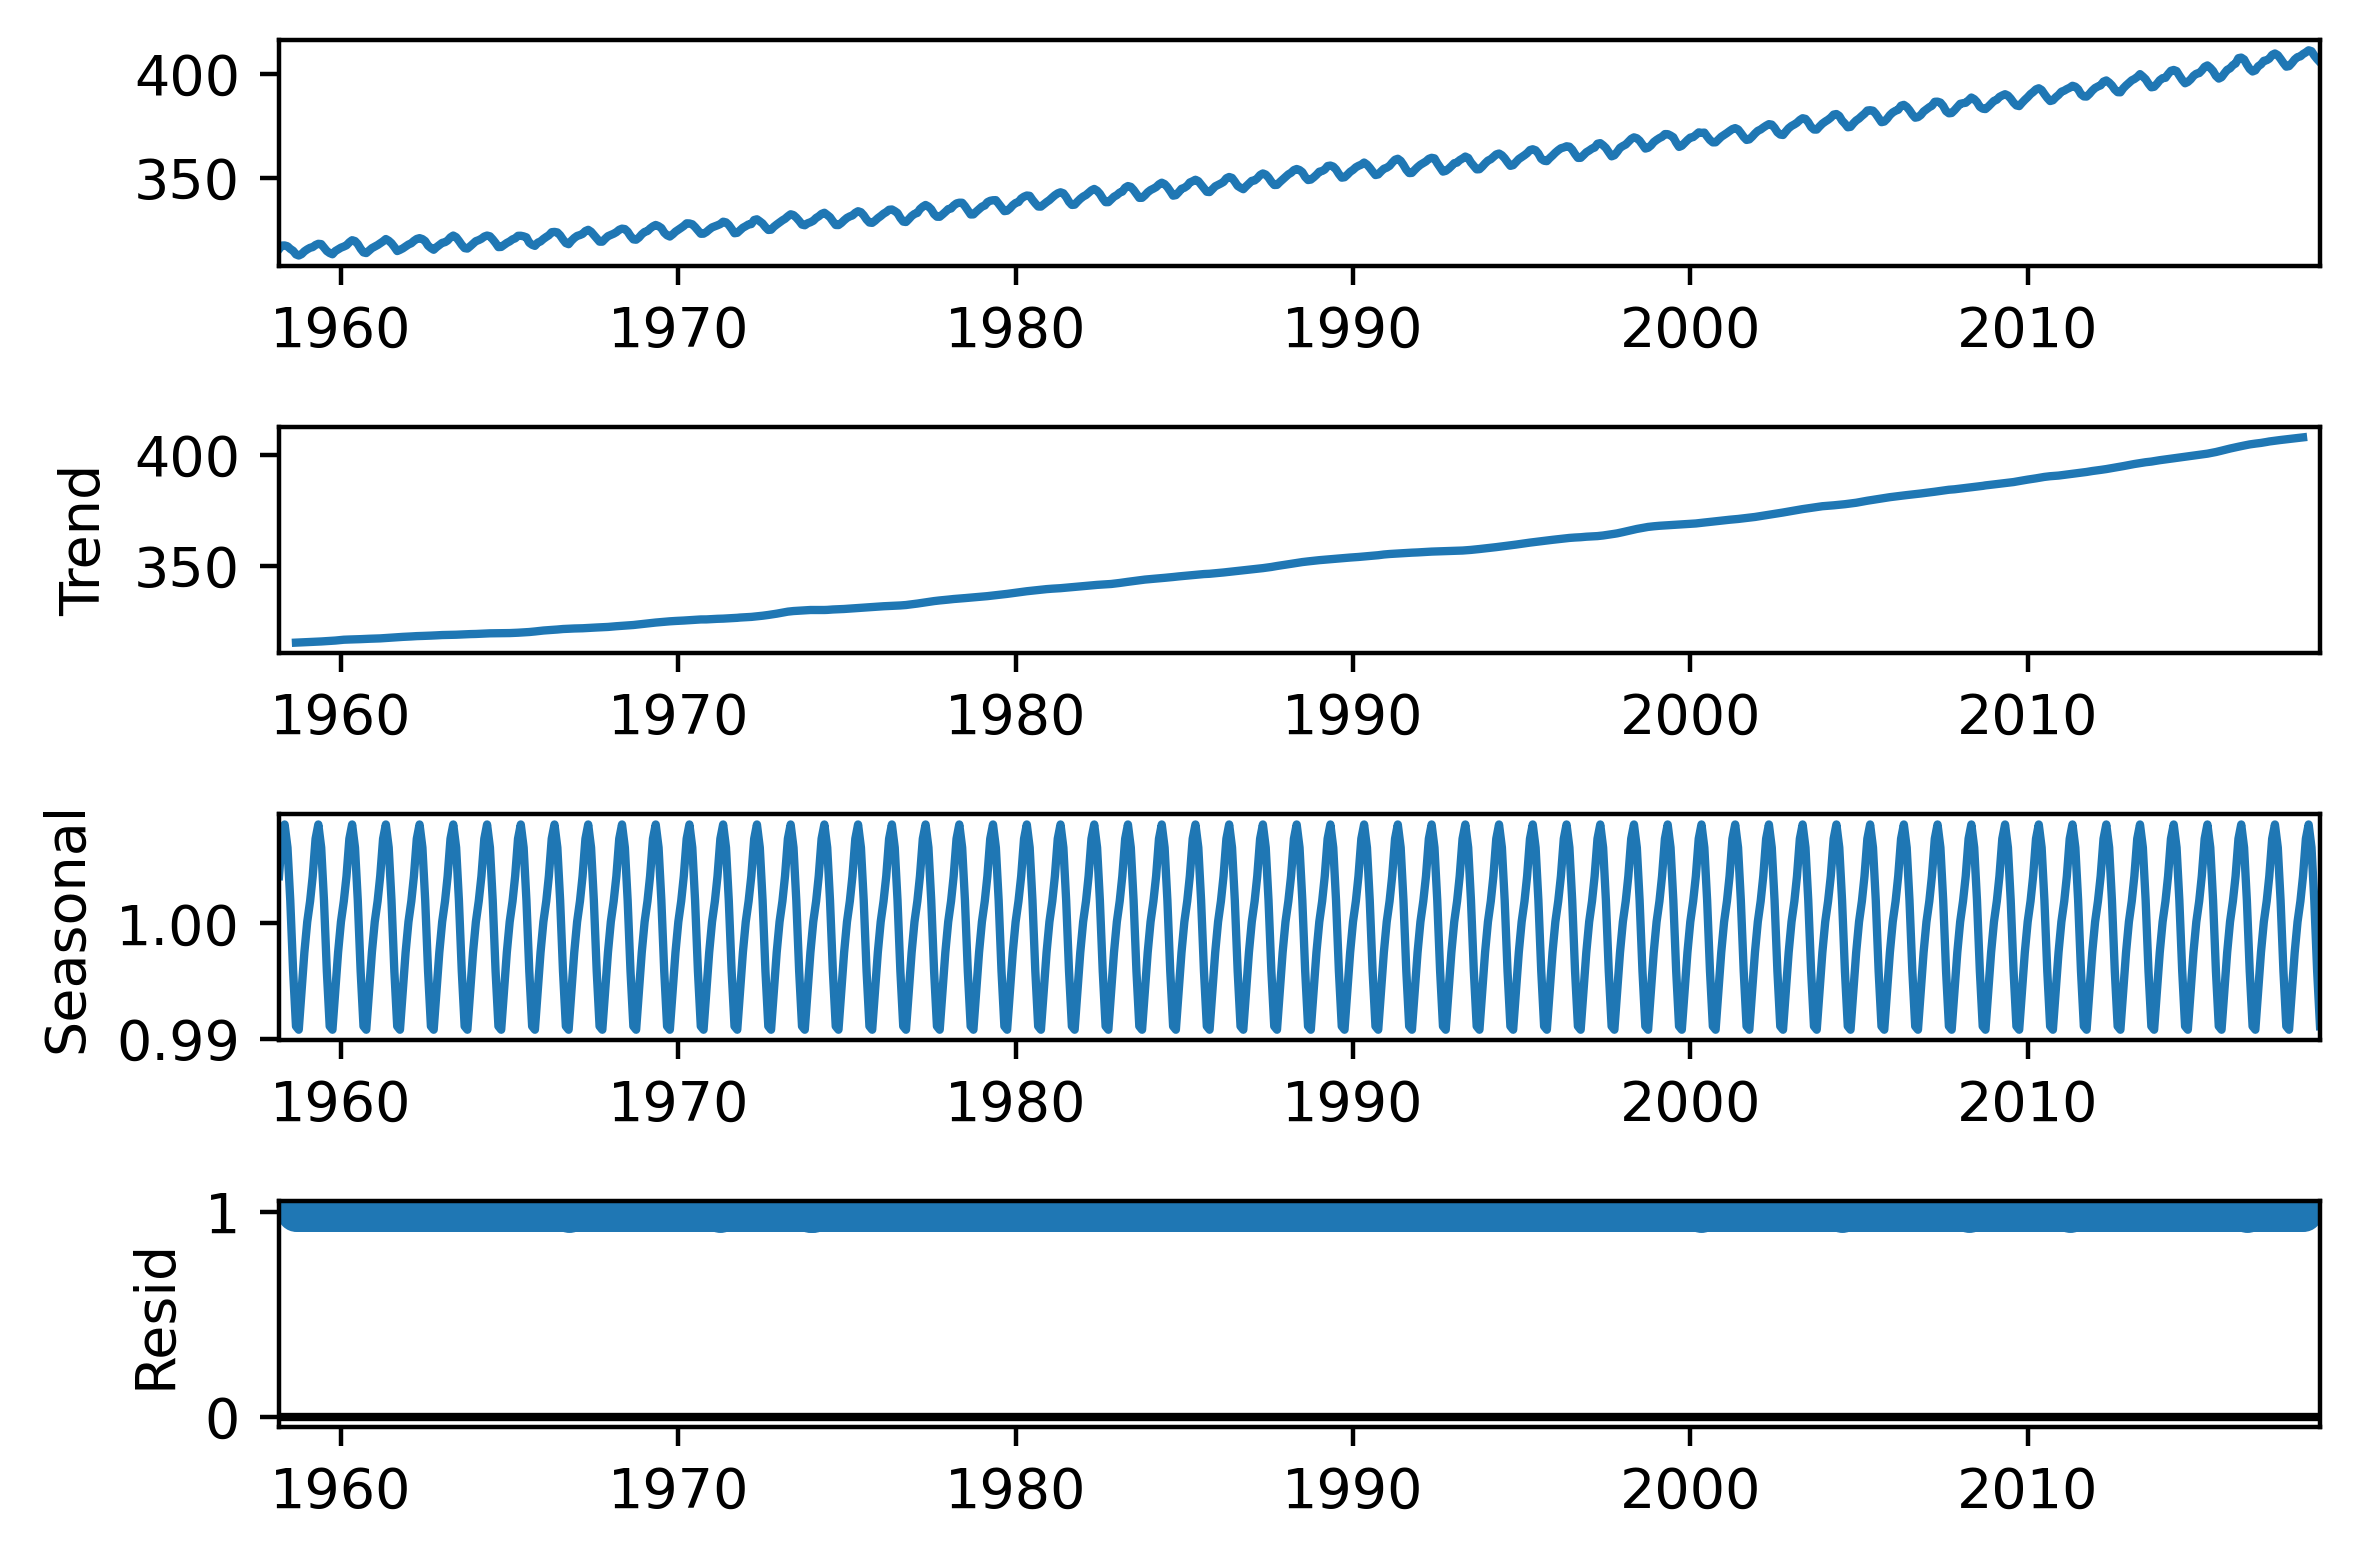

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp_results = seasonal_decompose(df, model='multiplicative')
decomp_results.plot()
plt.show()

In [11]:
import pmdarima as pm
model  = pm.auto_arima(df, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=374.226, Time=2.34 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=844.086, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=589.307, Time=0.44 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=375.959, Time=1.31 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=749.082, Time=0.22 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=376.215, Time=2.63 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=376.214, Time=5.37 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=571.041, Time=0.74 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=15.06 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=391.910, Time=1.12 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=374.811, Time=2.66 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=375.396, Time=2.62 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.86 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=375.303, Time=1.44 sec
 ARIMA(2,1,0)(0,1,1)[12]             : A

In [12]:
# Import model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create model object
model = SARIMAX(df, 
                order=(1, 1, 1),  
                seasonal_order=(0, 1, 1, 12), 
                trend='c')
# Fit model
results = model.fit()

C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [14]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            CO2_ppm   No. Observations:                  727
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -179.718
Date:                            Thu, 15 Oct 2020   AIC                            369.437
Time:                                    17:34:40   BIC                            392.291
Sample:                                03-01-1958   HQIC                           378.263
                                     - 09-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.001      2.804      0.005       0.001       0.003
ar.L1          0.2413      0.079   

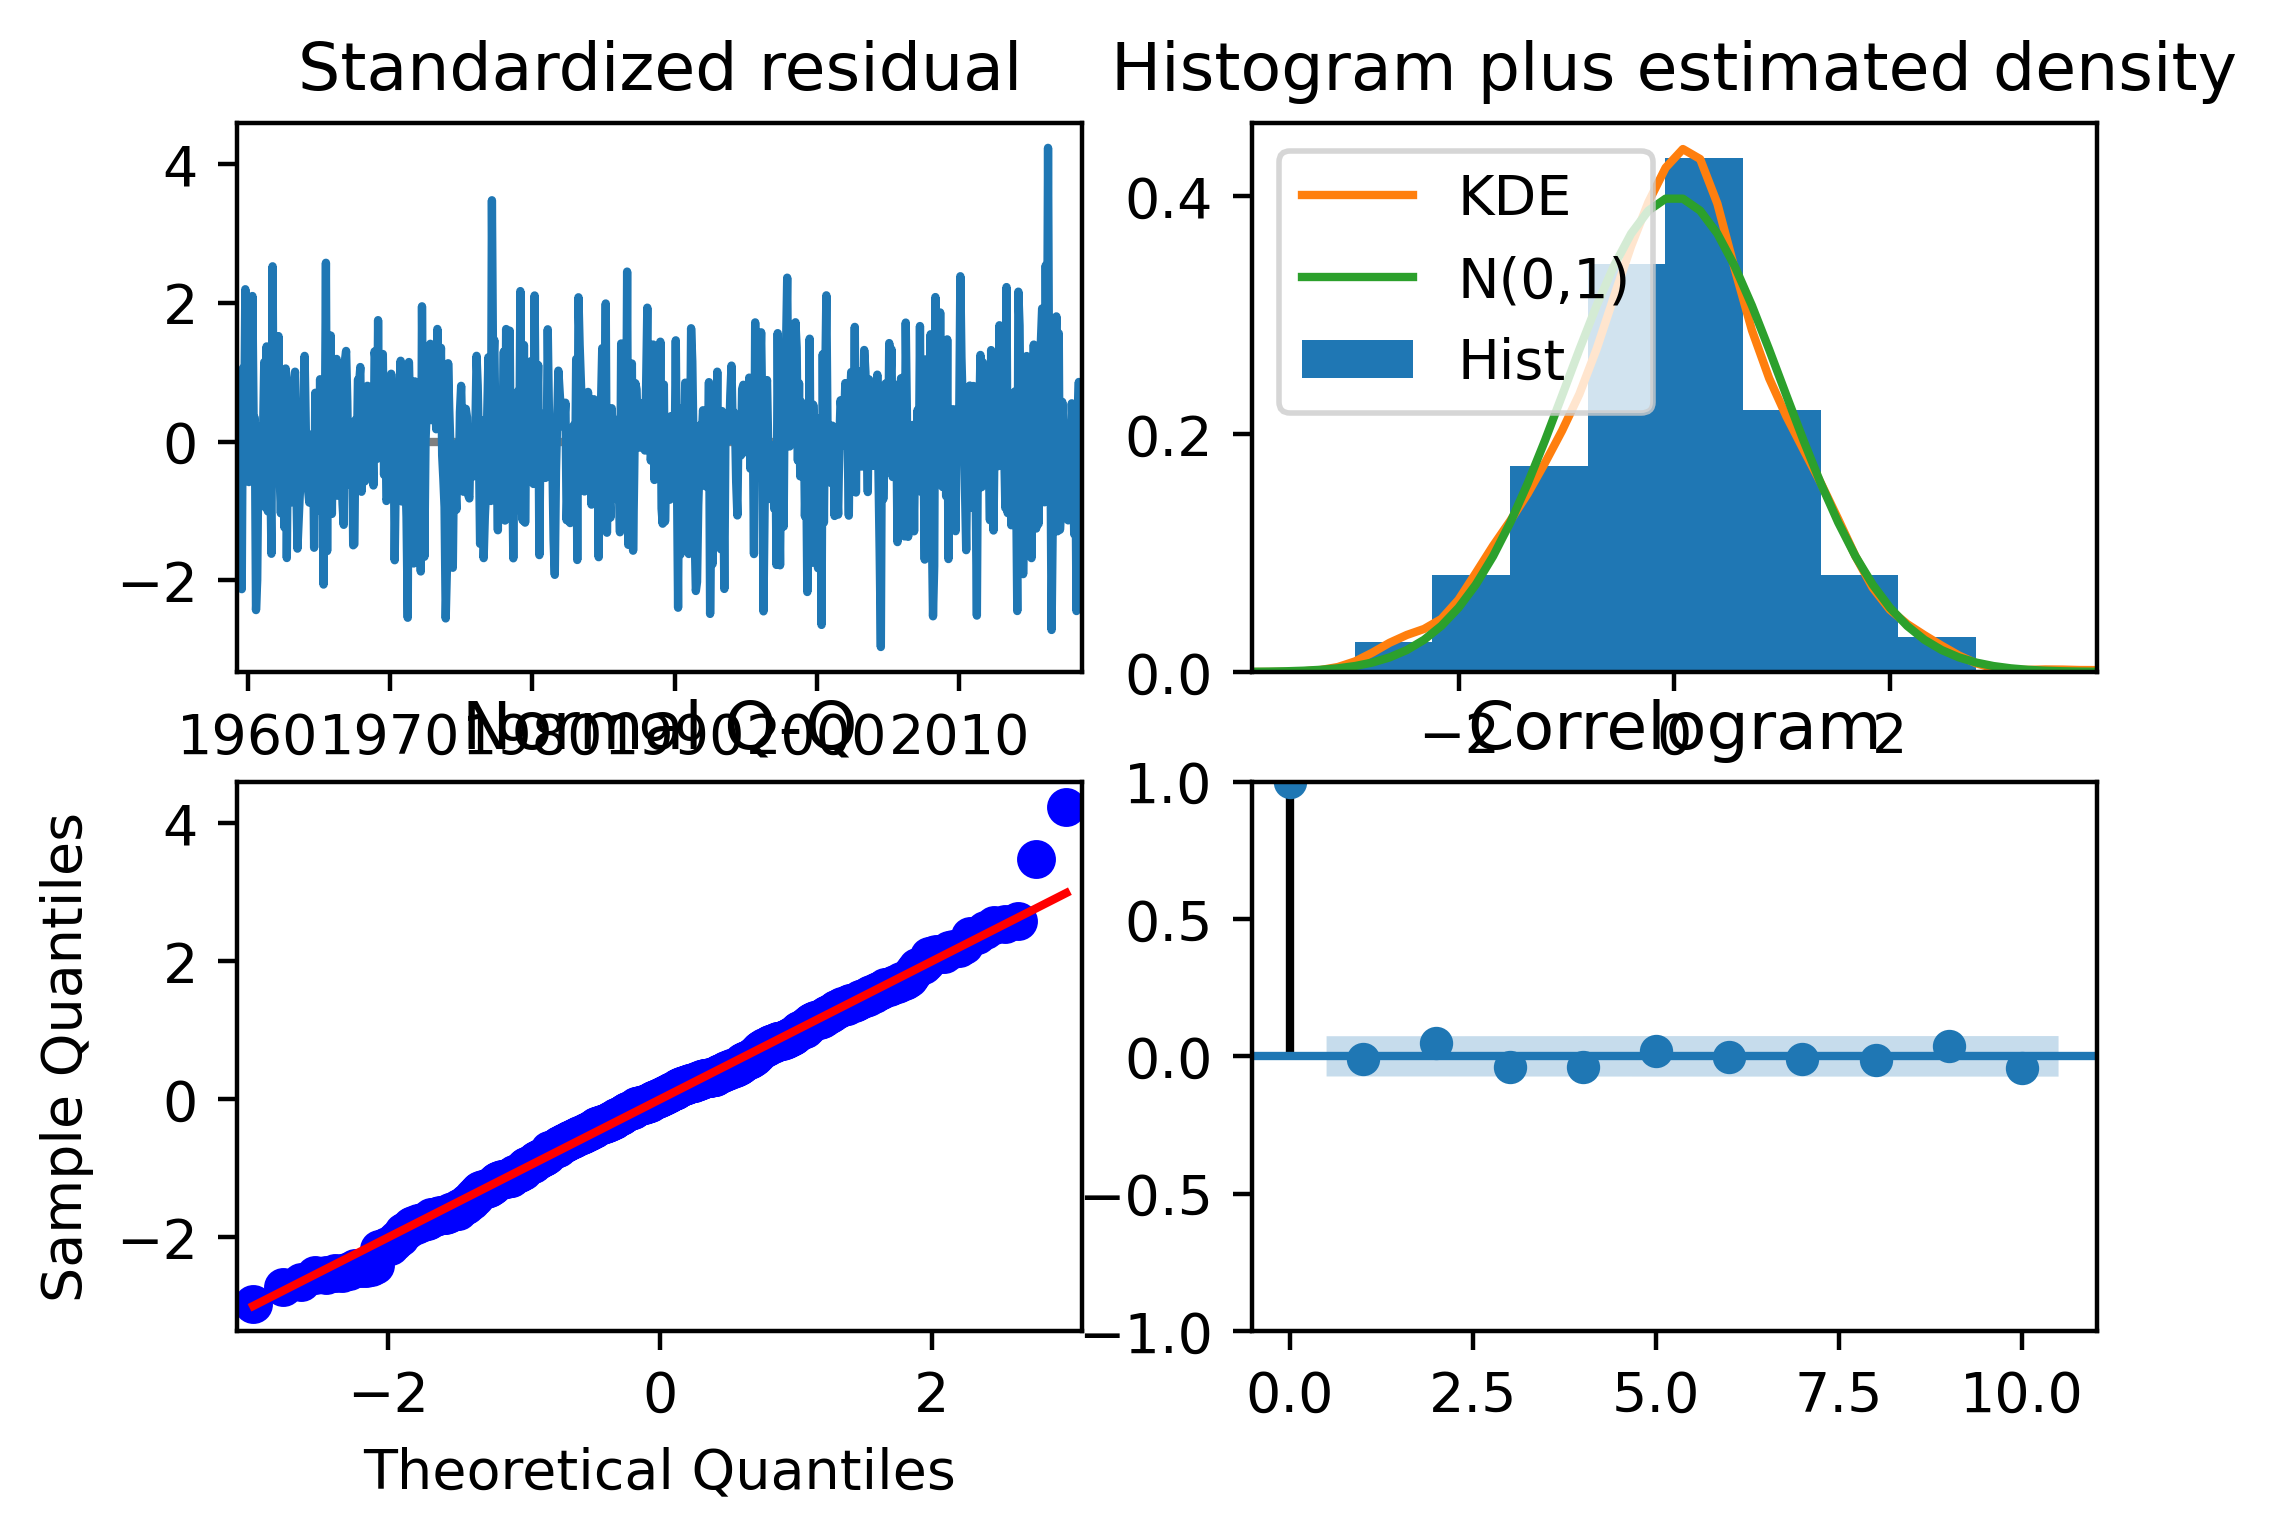

In [15]:
# Plot common diagnostics
results.plot_diagnostics()
plt.show()

In [16]:
# Create forecast object
forecast_object = results.get_forecast(steps=136)

# Extract prediction mean
mean = forecast_object.predicted_mean

# Extract the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

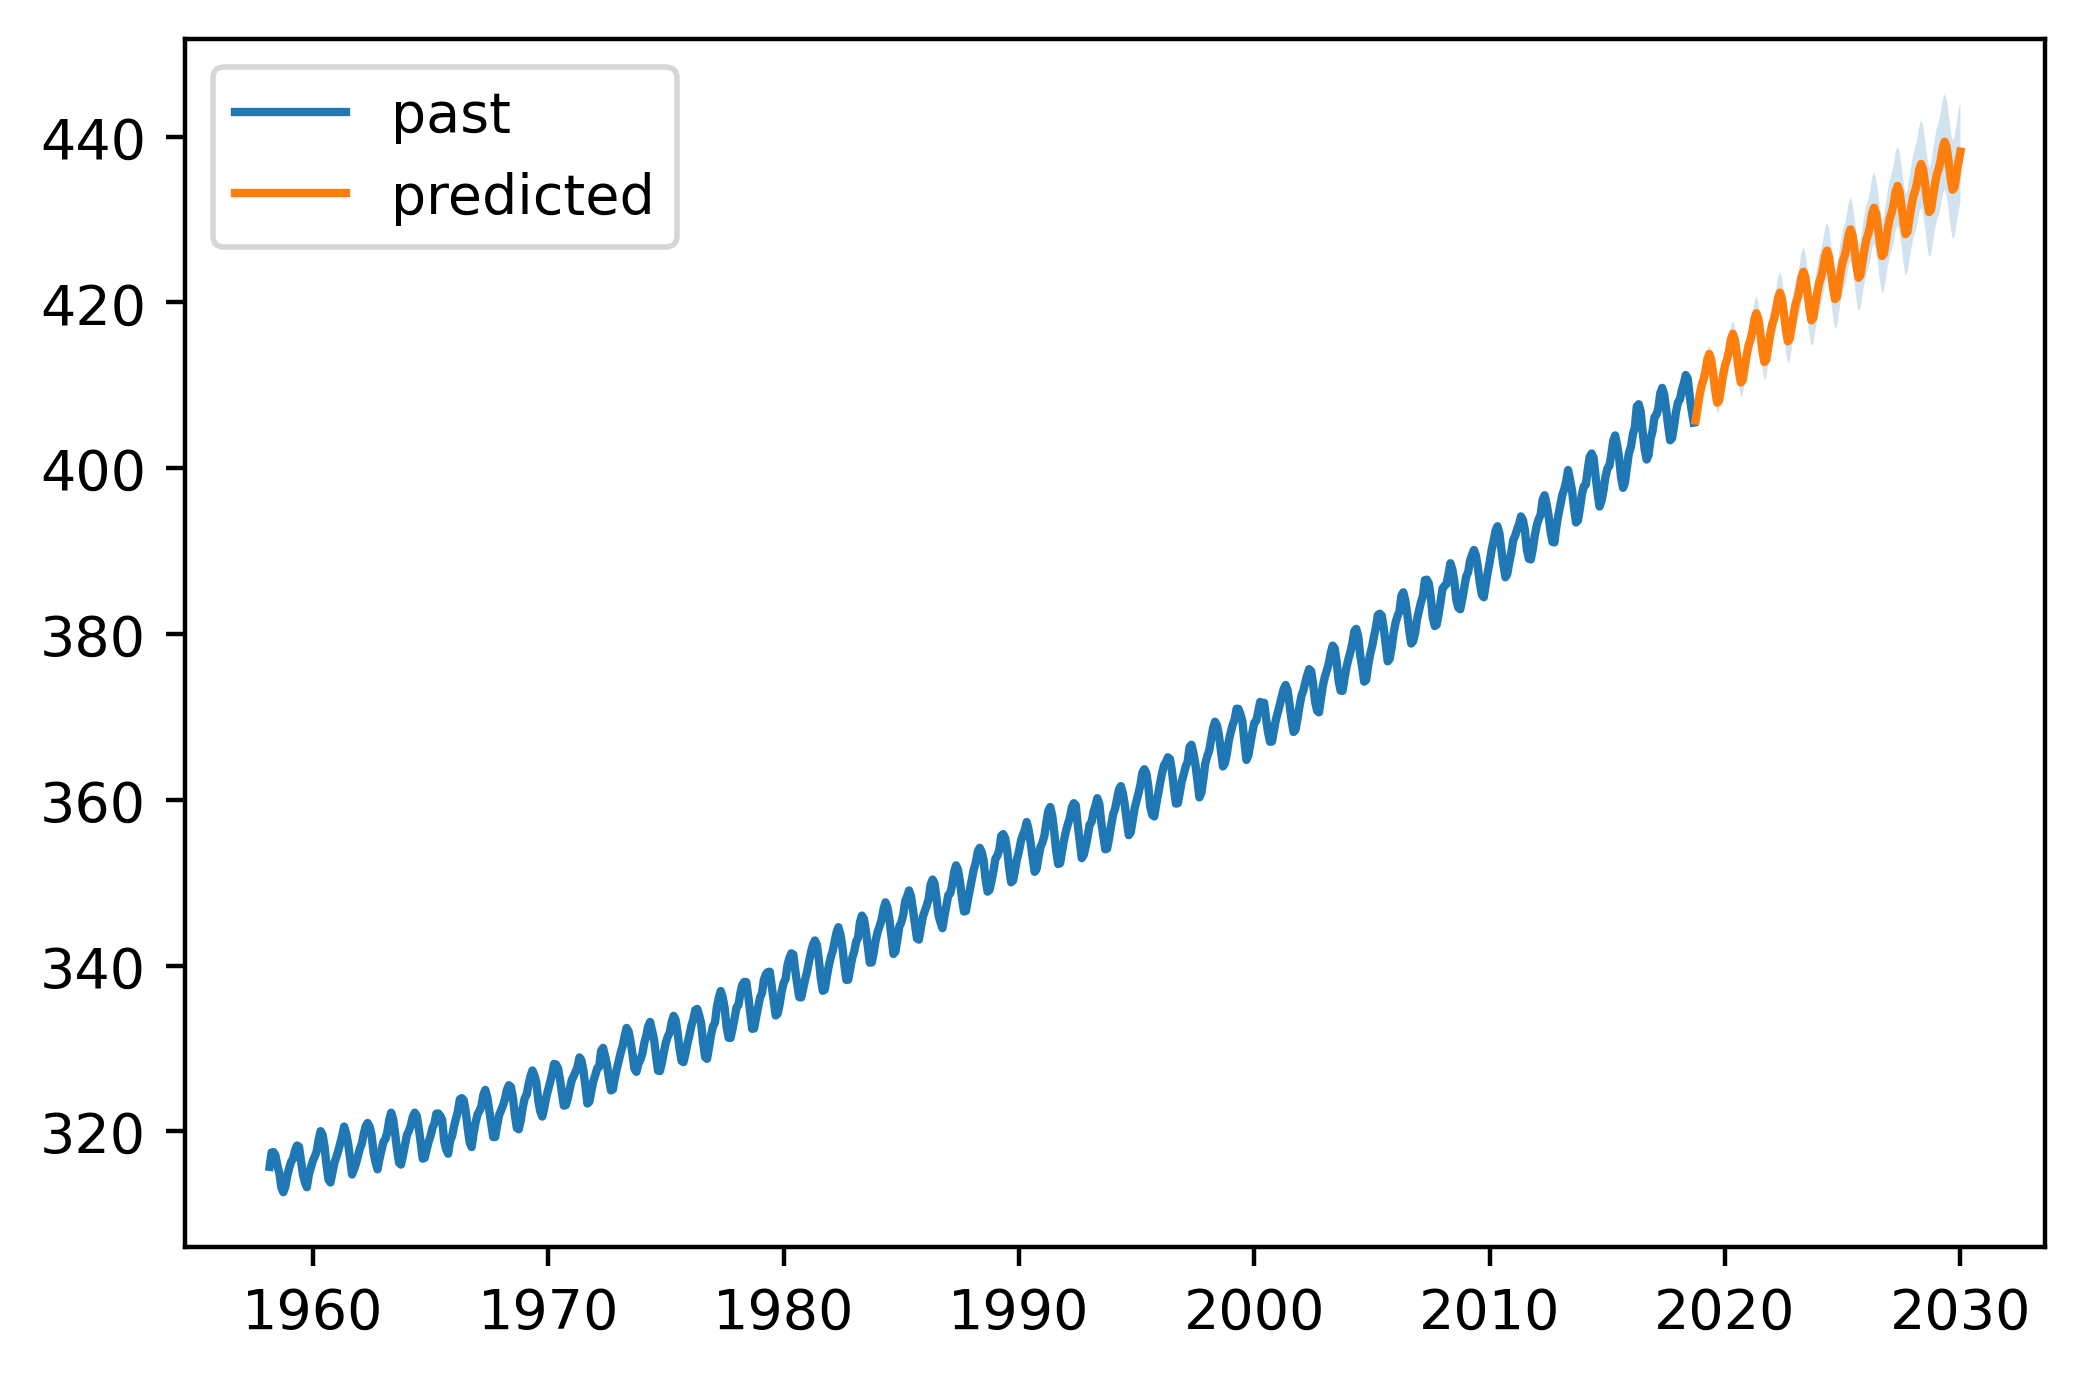

In [17]:
plt.figure()
plt.plot(df.index, df, label='past')
plt.plot(dates, mean, label='predicted')
plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)
plt.legend()

In [18]:
# Print last predicted mean
print(mean.iloc[-1])

# Print last confidence interval
print(conf_int.iloc[-1])

438.19677123609875
lower CO2_ppm    432.111376
upper CO2_ppm    444.282167
Name: 2030-01-01 00:00:00, dtype: float64
